In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [4]:
import cupy as cp

In [5]:
PROJECT_PATH = '../'
# SRBF_PATH = "/scratch/ceph/swei20/data/dnn/BHB/rbf_RedM_R5000_1k.h5"
REDM_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_RedM_R5000.h5"
sys.path.insert(0, PROJECT_PATH)

### Load data

In [6]:
with h5py.File(REDM_PATH, 'r') as f:
    flux0 = f['flux'][()]
    para0 = f['para'][()]
    wave0 = f['wave'][()]

In [7]:
flux0.shape, wave0.shape

((116614, 2204), (2204,))

In [8]:
from lv.base.dataloader_c import DataLoader

In [9]:
ds = DataLoader()

In [10]:
W="RedM"
R="W"

In [11]:
ds.prepare_data (W, R, flux0, wave0, para0, fix_CO=0)

flux: 6480, wave: 2204


# find mask

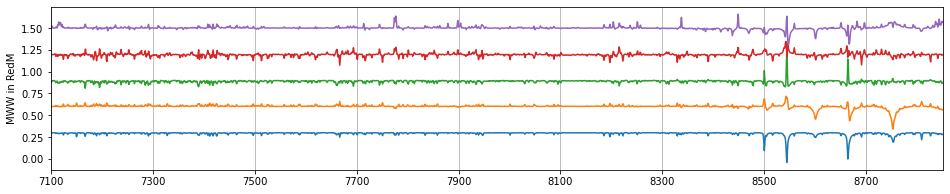

In [12]:
ds.init_pcp()

In [13]:
ds.flux.shape

(6480, 2204)

In [14]:
# k,q,prom = 10, 0.75, 0.1
k,q,prom = 5, 0.7, 0.02
peaks, prop, nvv= ds.get_peaks(k=k,q=q,prom=prom)

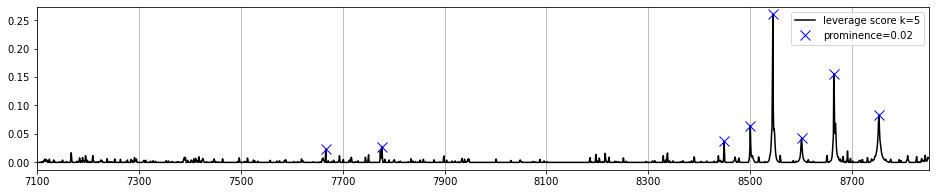

In [15]:
ds.plot_peaks(nvv, peaks, k, prom)

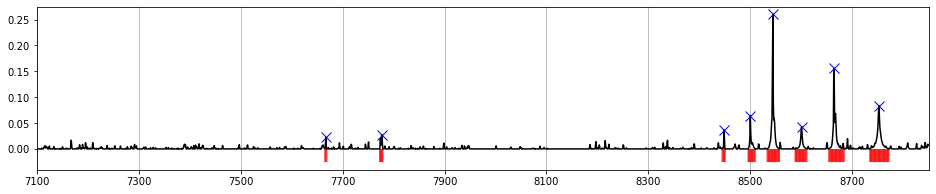

In [16]:
ds.plot_mask_from_peaks(peaks, prop, nvv)

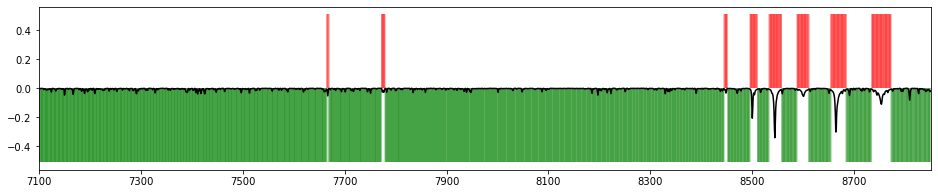

In [17]:
ds.plot_MN_mask(0)

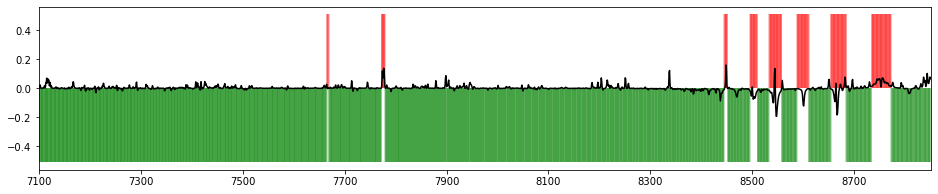

In [18]:
ds.plot_MN_mask(4)

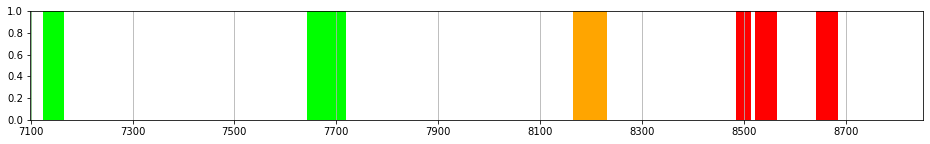

In [19]:
ds.plot_lick()

In [20]:
ds.get_MN(ds.nmask, top=5)

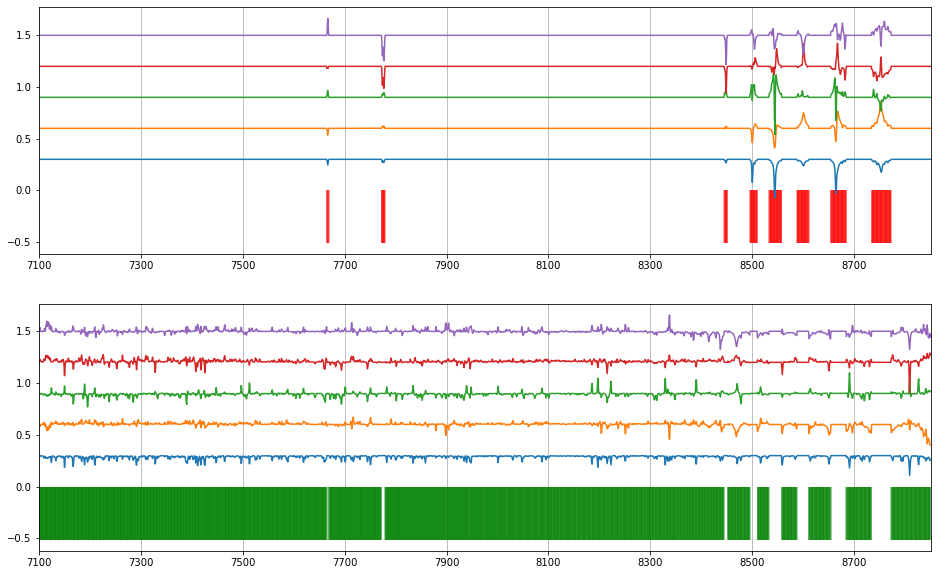

In [21]:
ds.plot_MN(step=0.3)

In [22]:
mu = 1.0 / ds.Mw[2]
ML, MS, MLv, MSv = ds._pcp(ds.M, delta=1e-5, mu=mu, lam=None, norm=None, maxiter=1000)

mu 0.09, lambda 0.0124, norm 13506.5


L(36, 174), S(30, 174)


(36, 2204)


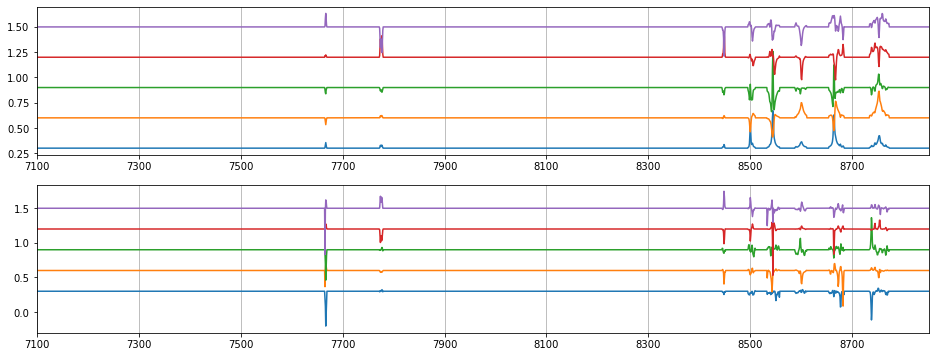

In [23]:
nMLv, nMSv =ds.eval_pcp(MLv, MSv)

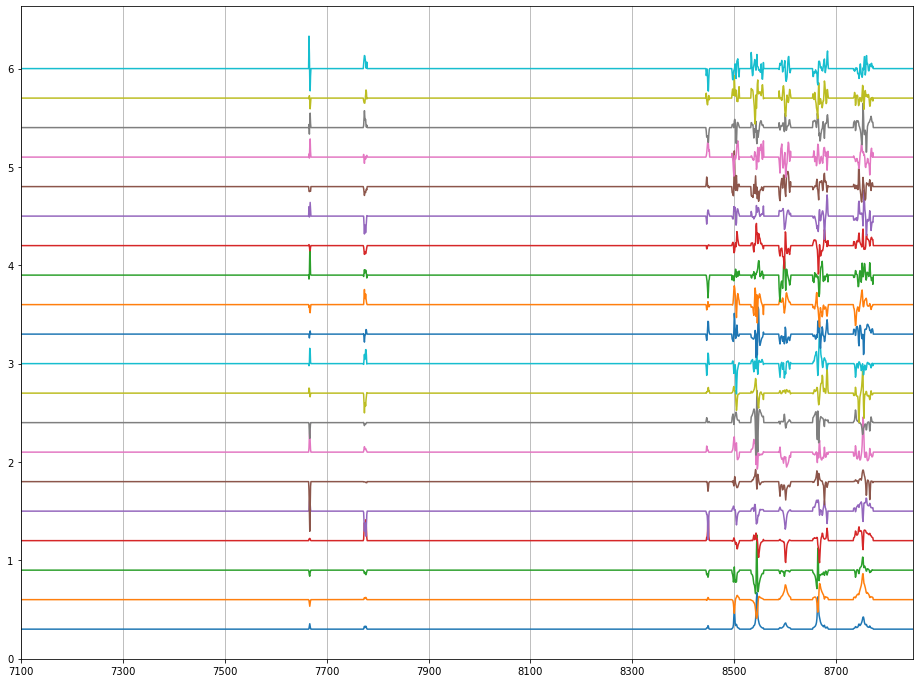

In [24]:
ds.plot_V(nMLv, top=20)

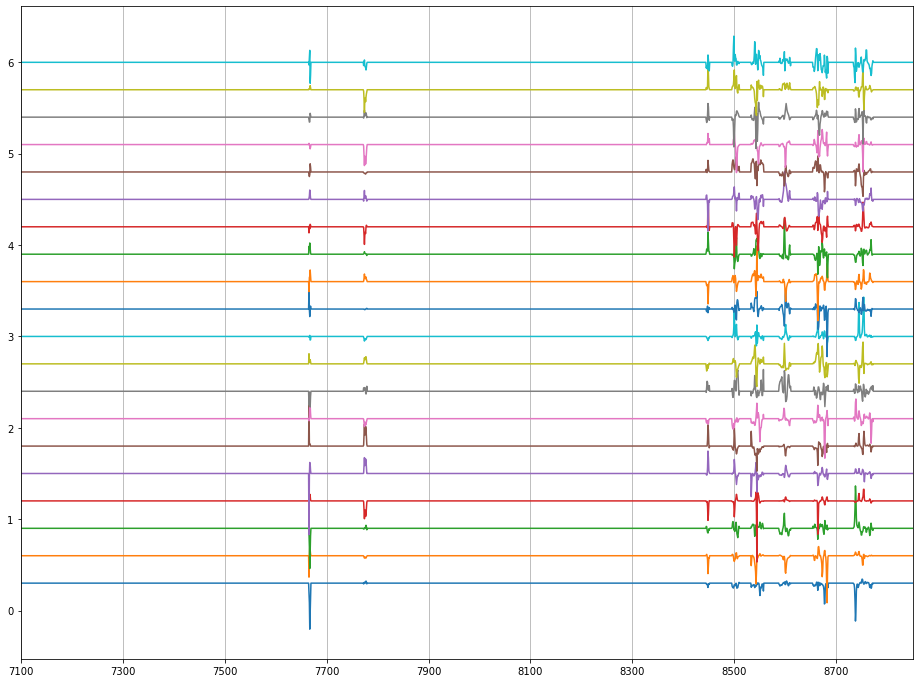

In [25]:
ds.plot_V(nMSv, top=20)

In [26]:
mu = 1.0 / ds.Nw[4]
NL, NS, NLv, NSv = ds._pcp(ds.N, delta=1e-6, mu=mu, lam=None, norm=None, maxiter=100)

mu 0.22, lambda 0.0124, norm 2898.8


L(43, 2030), S(30, 2030)


(43, 2204)


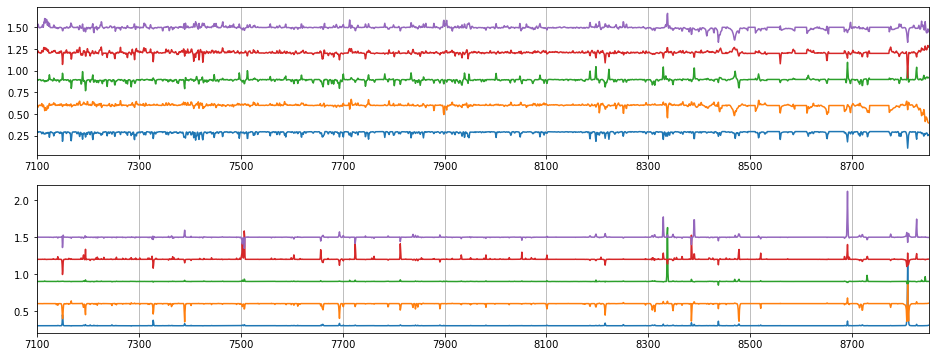

In [27]:
nNLv, nNSv = ds.eval_pcp(NLv, NSv, isM=0)

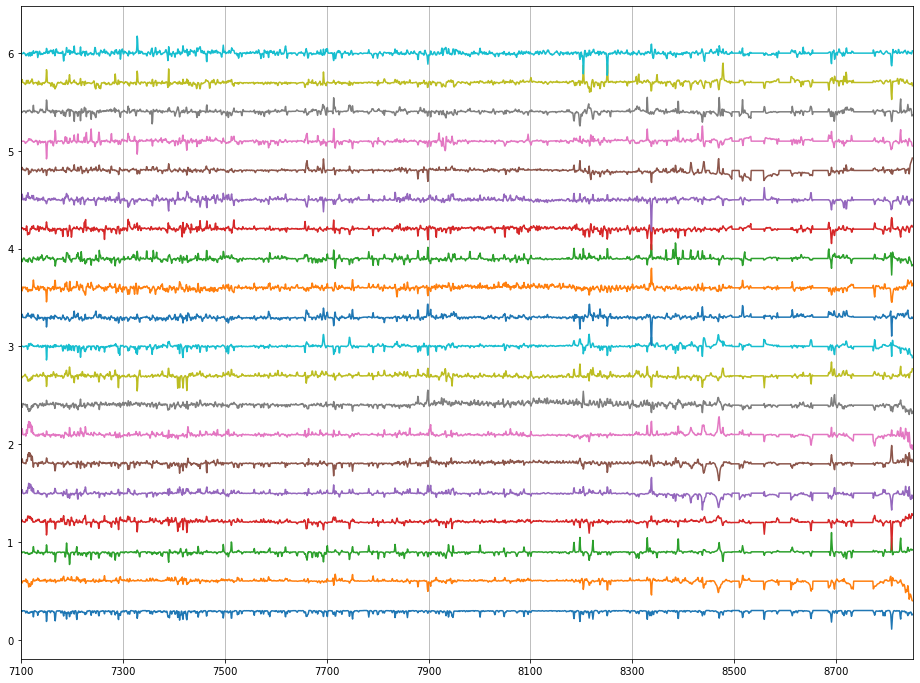

In [28]:
ds.plot_V(nNLv, top=20)

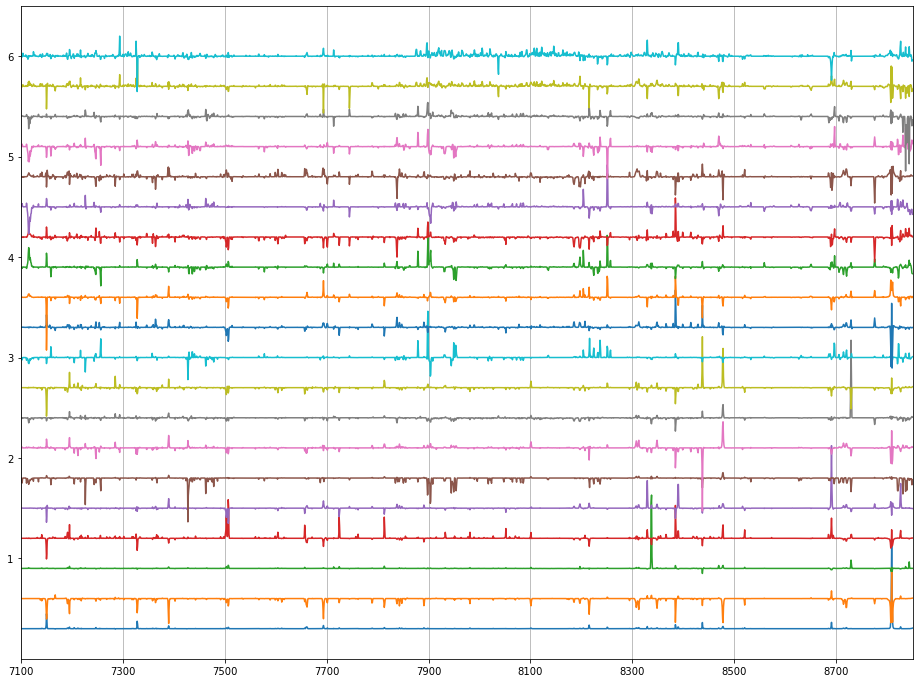

In [29]:
ds.plot_V(nNSv, top=20)

In [30]:
ds.pcp_transform(MLv, MSv, NLv, NSv, top=20)

In [31]:
ds.pcp_np(save=1)

/scratch/ceph/swei20/data/dnn/MWW/bosz_pcp.h5


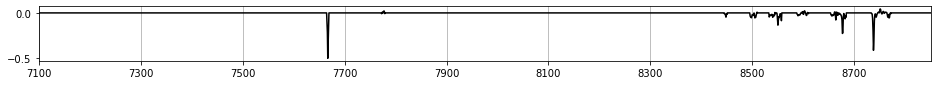

In [43]:
ds.plot_nv(ds.nXv, 20)

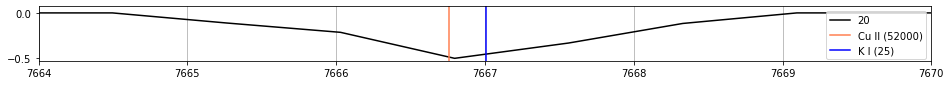

In [53]:
ds.plot_nv(ds.nXv, 20,fineW=1)
plt.xlim(7664,7670)
plt.axvline(7666.76 , color="coral", label="Cu II (52000)")
plt.axvline(7667.01 , color="b", label="K I (25)")
plt.legend()

In [103]:
ds.nPC = 20

{1, 3, 5, 6, 8, 9, 12, 14, 16, 18, 19, 20, 23, 24, 30, 31, 32, 33, 34, 36}


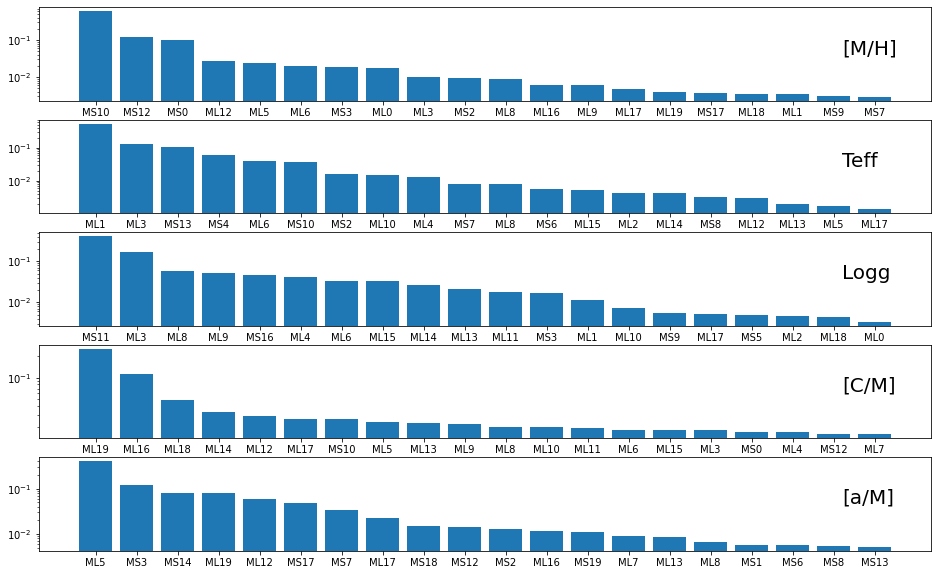

In [102]:
ds.get_all_Mrf(top=20, plot=1)

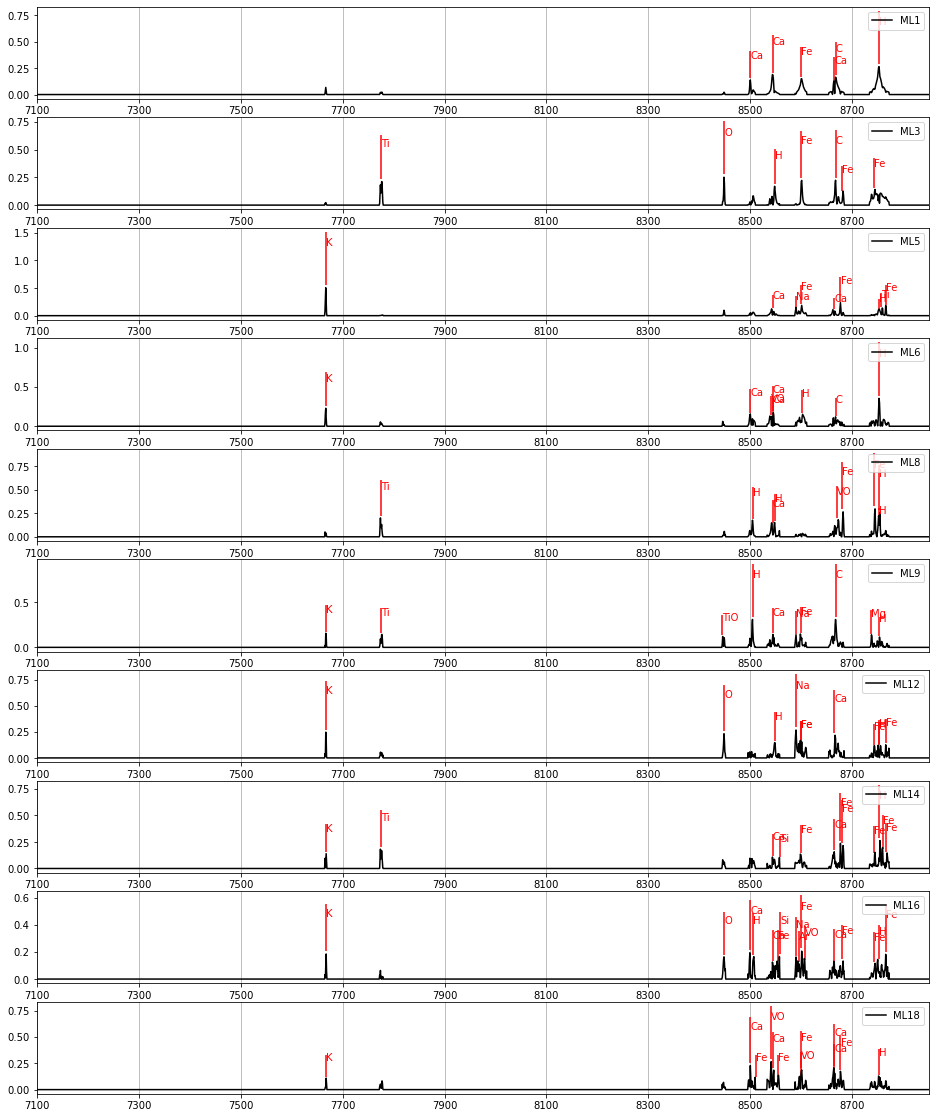

In [104]:
ds.plot_Mdx(top=10)

In [ ]:
ds.get_all_Mrf(top=20, plot=1)

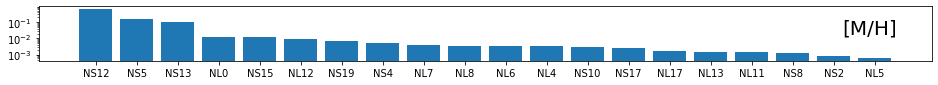

In [111]:
ds.get_Xrf(pdx=0, )